In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
from numpy import array
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
mr = pd.read_csv("IMDB Dataset.csv")

In [9]:
#hmlt tag
mr['review'] = mr['review'].replace({'<.*?>': ''}, regex = True)
# lower case
mr['review'] = mr['review'].str.lower()
mr.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


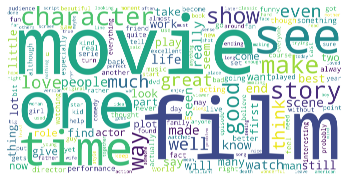

In [11]:
text = mr[mr.sentiment=='positive'].review.tolist() 
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True, width=8000,height=4000,min_font_size=30, background_color="white").generate(text)
#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

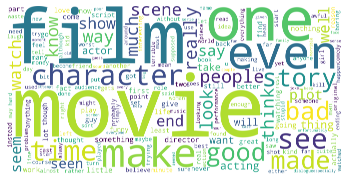

In [20]:
text = mr[mr.sentiment=='negative'].review.tolist() 
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True, width=8000,height=4000,min_font_size=30, background_color="white").generate(text)
#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [23]:
# create a list of candidates
sentiments = mr.sentiment.unique()
#create a list of responses for each candidate using a list comprehension
corpus = [' '.join(mr[(mr.sentiment==feeling)].review.tolist()) for feeling in sentiments]

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate a CountVectorizer object
# utilize the new STOP_WORDS list
cv=CountVectorizer( stop_words=STOPWORDS, ngram_range=(1, 3))

# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names())
bow.index=sentiments

C:\Users\Admin\anaconda3\envs\keras\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
# create a pandas Series of the top 4000 most frequent words
text=bow.loc['positive'].sort_values(ascending=False)[:4000]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=bow.loc['positive'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:

def preprocess_text(data):
    stop = stopwords.words('english')
    punct = '''!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~''' 
    #Make lower
    data['review'] = data['review'].str.lower()
    #Remove stopwords
    data['review'] = data['review'].apply(lambda x:' '.join([words for words in x.split() if words not in stop]))
    #Remove punctuations
    data['review'] = data['review'].replace({'<.*?>': ' '}, regex = True)  
    data['review'] = data['review'].replace({'[^a-zA-Z]': ' '}, regex = True)
    data['review'] = data['review'].replace({'[0-9]': ' '}, regex = True)
    data['review'] = data['review'].replace({r"\s+[a-zA-Z]\s+": ' '}, regex = True)
    data['review'] = data['review'].replace({r'\s+': ' '}, regex = True)
    data['word_count'] = data['review'].str.split().str.len()
    
    return data
movie_reviews = preprocess_text(movie_reviews)
movie_reviews.head()

,review,sentiment,word_count
0,one reviewers mentioned watching oz episode ho...,positive,175
1,wonderful little production filming technique ...,positive,89
2,thought wonderful way spend time hot summer we...,positive,88
3,basically there family little boy jake thinks ...,negative,68
4,petter mattei love time money visually stunnin...,positive,128


Text(0.5, 1.0, 'Kernel Distribution of Number of words')

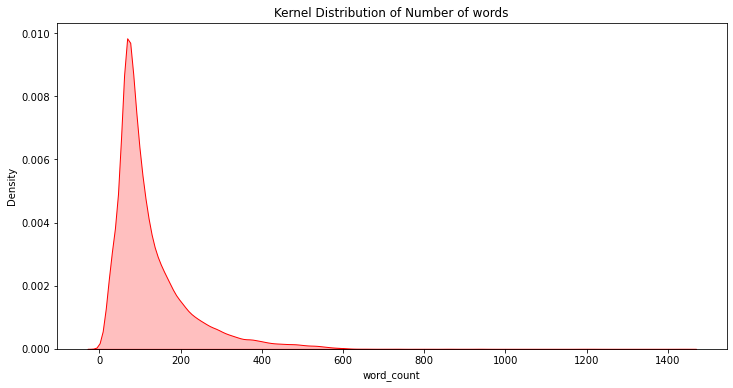

In [42]:
z = movie_reviews['word_count']
z.describe()
plt.figure(figsize=(12,6))
sns.kdeplot(movie_reviews['word_count'],shade=True,color='r').set_title('Kernel Distribution of Number of words')

In [58]:
from wordcloud import WordCloud
#get postive and negative sentiment records for wordcloud
positive = movie_reviews['review'][movie_reviews['sentiment']=="positive"]
negative = movie_reviews['review'][movie_reviews['sentiment']=="negative"]
#negative
## Wordcloud
pos_wordcloud = WordCloud(stopwords=stop).generate(' '.join(positive))
neg_wordcloud = WordCloud(stopwords=stop).generate(' '.join(negative))
# pos_wordcloud = WordCloud(stopwords=stop,width=800,height=800,min_font_size=10).generate(' '.join(positive))
# neg_wordcloud = WordCloud(stopwords=stop,width=800,height=800,min_font_size=10).generate(' '.join(negative))

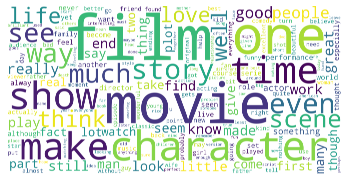

In [65]:
pos_wordcloud = WordCloud(width=8000,height=4000,min_font_size=30, background_color="white").generate(' '.join(positive))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

3        basically there family little boy jake thinks ...
7        show amazing fresh innovative idea first aired...
8        encouraged positive comments film looking forw...
10       phil alien one quirky films humour based aroun...
11       saw movie came out recall scariest scene big b...
                               ...                        
49994    typical junk comedy there almost laughs genuin...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    i going disagree previous comment side maltin ...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 25000, dtype: object
0        one reviewers mentioned watching oz episode ho...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
4        petter mattei love time money visually stunnin...
5        probably all time favorite movie story selfles...
             

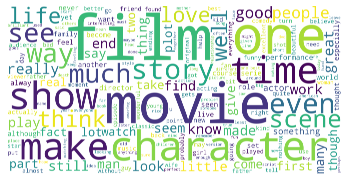

In [66]:
neg_wordcloud = WordCloud(width=8000,height=4000,min_font_size=30, background_color="white").generate(' '.join(negative))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [45]:
X = movie_reviews['review']
y = y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train)

39396    see little girls enjoying show calling family ...
22675    haggard even need graded since never designed ...
48446    recently saw palm springs international film f...
29637     they actors filmmakers certainly audience amo...
33233    usually film sylvester stallone usually going ...
                               ...                        
31273    here yet another piece evidence claim worship ...
41158    tight script good direction excellent performa...
46570    loved movie since first saw m still amazed acc...
26031    never forget wit great comedy original vacatio...
24921    movie must looked pitched development stage ge...
Name: review, Length: 40000, dtype: object


In [53]:
import keras
imdb = keras.datasets.imdb
num_words = 20000
(X_train,y_train), (X_test,y_test) = imdb.load_data(seed=1, num_words=num_words)

In [68]:
print(X_train[3])
print('sentiment:', y_train[3])

[1, 2, 117, 799, 5, 13, 26, 532, 10469, 189, 20, 4368, 75, 28, 110, 43, 44, 285, 262, 865, 1554, 150, 75, 28, 110, 6, 176, 7, 52, 865, 102, 5, 6, 176, 7, 78, 663, 14, 34, 230, 9, 4, 249, 20, 13, 28, 126, 110, 11, 61, 436, 113, 24, 64, 16, 4, 116, 527, 21, 4, 318, 302, 2876, 5, 126, 865, 97, 56, 16, 4, 249, 13, 28, 110, 48, 25, 70, 60, 683, 12, 97, 56, 328, 744, 2694, 187, 4, 523, 14, 9, 484, 3170, 15, 25, 144, 115, 1919, 6, 274, 34, 45, 1108, 1203, 4, 1108, 8, 4, 20, 9, 4, 64, 1047, 155, 44, 81, 129, 14448, 6, 2077, 5, 81, 24, 106, 14, 20, 13, 16, 38, 2, 44, 14, 20, 13, 435, 17, 230, 17, 1489, 6, 13492, 854, 23, 4, 1004, 7, 4, 20, 159, 13, 3782, 12, 8, 20, 660, 14, 20, 1870, 92, 437, 129, 58, 994, 150, 2, 13, 92, 181, 259, 334, 8, 437, 6, 52, 20, 314, 23, 14, 2, 20, 13, 92, 60, 124, 89, 12, 188, 4, 2896, 15, 12, 122, 830, 144, 30, 11, 4, 1566]
sentiment: 0


In [70]:
vocabulary = imdb.get_word_index()
# The first indices are reserved
vocabulary = {k:(v+3) for k,v in vocabulary.items()} 
vocabulary["<PAD>"] = 0
# See how integer 1 appears first in the review above. 
vocabulary["<START>"] = 1
vocabulary["<UNK>"] = 2  # unknown
vocabulary["<UNUSED>"] = 3

# reversing the vocabulary. 
# in the index, the key is an integer, 
# and the value is the corresponding word.
index = dict([(value, key) for (key, value) in vocabulary.items()])

def decode_review(text):
    '''converts encoded text to human readable form.
    each integer in the text is looked up in the index, and 
    replaced by the corresponding word.
    '''
    return ' '.join([index.get(i, '?') for i in text])

In [84]:
review = ['great', 'brilliant','crap','bad', 
          'fantastic', 'movie', 'seagal']
enc_review = [vocabulary[word] for word in review]
enc_review

[87, 530, 595, 78, 777, 20, 3272]

In [96]:
model = Sequential()
model.add(keras.layers.Embedding(len(vocabulary), 2, input_length=100))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 100, 2)            177176    
_________________________________________________________________
flatten_17 (Flatten)         (None, 200)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 1005      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 6         
Total params: 178,187
Trainable params: 178,187
Non-trainable params: 0
_________________________________________________________________
None


In [98]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [100]:
embedding_matrix = zeros((vocabulary, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix  

ValueError: Error when checking input: expected embedding_17_input to have shape (100,) but got array with shape (1,)

In [29]:
review = ['great', 'brilliant','crap','bad', 
          'fantastic', 'movie', 'seagal']
enc_review = [vocabulary[word] for word in review]
enc_review

[87, 530, 595, 78, 777, 20, 3272]

<class 'list'> 1 (100, 100)


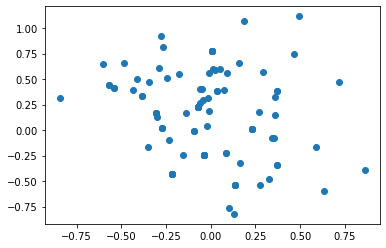

In [35]:
# with a Sequential model
get_embed_out = keras.backend.function(
    [model.layers[0].input],
    [model.layers[1].output])
layer_output = get_embed_out([X_test[0]])
print(type(layer_output), len(layer_output), layer_output[0].shape)
words = layer_output[0]
plt.scatter(words[:,0], words[:,1])

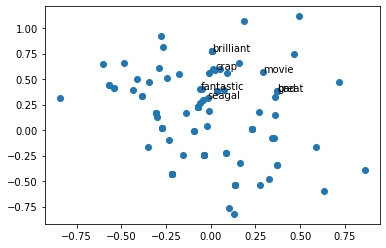

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(words[:,0], words[:,1])
for i, txt in enumerate(review):
    plt.annotate(txt, (words[i,0], words[i,1]))

ValueError: too many values to unpack (expected 2)

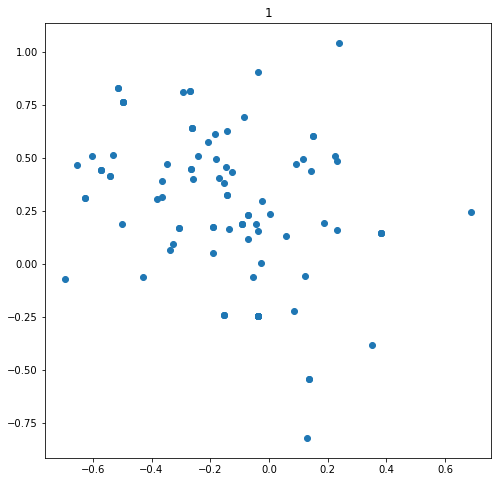

In [14]:
wc = X[].str.split().str.len()

SyntaxError: invalid syntax (<ipython-input-14-f3aeea35d1aa>, line 1)